<IPython.core.display.Javascript object>


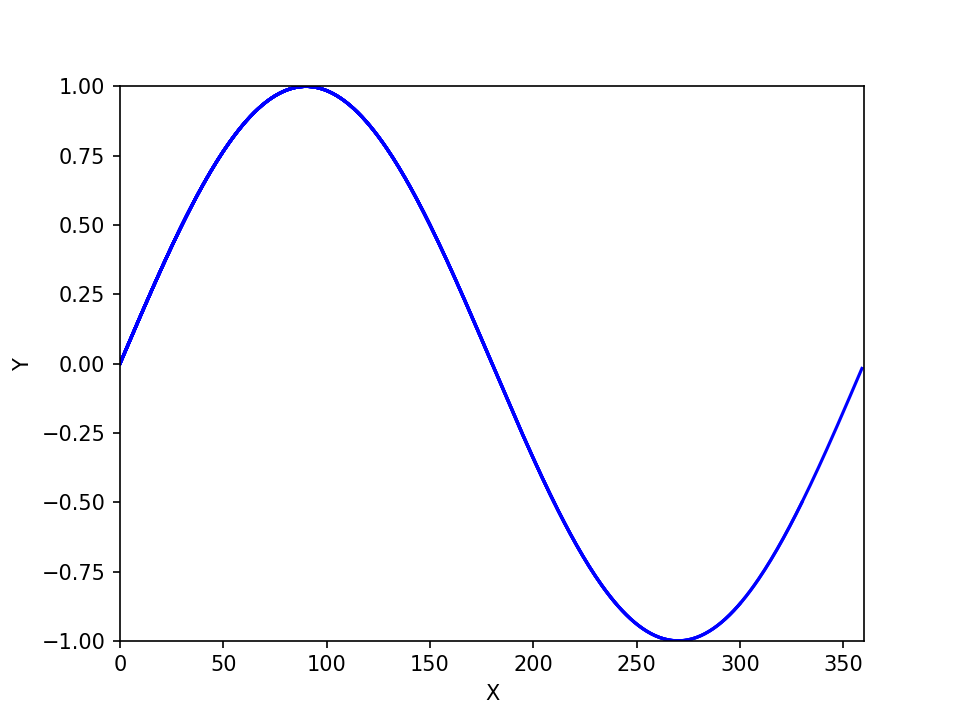

In [5]:
"Dynamic plotting in matplotlib. Copy and paste into a Jupyter notebook."
# written October 2016 by Sam Greydanus
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y, ax, colors=['b']):
    for color in colors:
        ax.plot(x, y, color)
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X') ; ax.set_ylabel('Y')
ax.set_xlim(0,360) ; ax.set_ylim(-1,1)
xs, ys = [], []

# this is any loop for which you want to plot dynamic updates.
# in my case, I'm plotting loss functions for neural nets
for x in range(360):
    y = np.sin(x*np.pi/180)
    xs.append(x)
    ys.append(y)
    if x % 30 == 0:
        plt_dynamic(xs, ys, ax)
        time.sleep(.2)
plt_dynamic(xs, ys, ax)

In [330]:
from dataclasses import dataclass


# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
@dataclass()
class Point:
    x: float
    y: float
    z: float


@dataclass()
class Sphere(Point):
    R: float


def is_point_belongs_to_sphere(p: Point, s: Sphere):
    return (p.x - s.x) ** 2 + (p.y - s.y) ** 2 + (p.z - s.z) ** 2 - s.R**2

def sphere_intersect_checking(p1: Point, p2: Point, s: Sphere) -> bool:
    f1 = is_point_belongs_to_sphere(p1, s)
    f2 = is_point_belongs_to_sphere(p2, s)
    if p1 == p2:
        return False
    if f1 * f2 <= 0:
        return True
    if f1 + f2 < 0:
        return True
    if f1 + f2 > 0:
        xc = (p1.x + p2.x) / 2
        yc = (p1.y + p2.y) / 2
        zc = (p1.z + p2.z) / 2
        c = Point(xc, yc, zc)
        # print(f"Новая точка {c} left {p1} right {p2}")
        if (c == p1 or c == p2):
            return False
        if f1 > f2:
            return sphere_intersect_checking(c, p2, s)
        else:
            return sphere_intersect_checking(p1, c, s)
    return False


import numpy as np
def distance(ar1, ar2 = [0,0,0]):
    return ((ar1[0] - ar2[0])**2 + (ar1[1] - ar2[1])**2 + (ar1[2] - ar2[2])**2)**0.5

def first_dir(point):
    new_point = point.copy()
    length = np.random.exponential()
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    z = random.uniform(-1, 1)
    l = distance([x,y,z], [0,0,0])
    new_point[0] += x * (length / l)
    new_point[1] += y * (length / l)
    new_point[2] += z * (length / l)
    return new_point

def calc_omega(point, new_point):
    l = distance(point, new_point)  
    omega = []
    for i in range(3):
        omega.append((new_point[i] - point[i])/l)
    return omega

def create_paths(n_points, sour):
    points = []
    count = 0
    while count < n_points:
        x = random.uniform(0, 0.5)
        y = random.uniform(0, 0.5)
        z = random.uniform(0, 0.5)
        if distance([x,y,z], sour) <= 0.5 and not([x,y,z] in points):
            points.append([x,y,z])
            count += 1
    trajectories = []
    for i in range(0, n_points):
        trajectories.append([[points[i][0]],[points[i][1]],[points[i][2]]])
    
    for i in range(0, n_points):
        point = [trajectories[i][0][0], trajectories[i][1][0], trajectories[i][2][0]]
        new_point = first_dir(point)
        for j in range(3):
            trajectories[i][j].append(new_point[j])
    return trajectories

def scattering(omega):
    omega_new = omega.copy()
    zenith = random.uniform(-1, 1)
    zenith = np.arccos(zenith)
    azimut = random.uniform(0, 2*np.pi)
    if (omega[2] != 1):
        omega_new[0] = omega[0]*np.cos(zenith) + np.sin(zenith)*(omega[0]*omega[2]*np.cos(azimut) - omega[1]*np.sin(azimut))/((1 - omega[2]**2)**0.5)
        omega_new[1] = omega[1]*np.cos(zenith) + np.sin(zenith)*(omega[1]*omega[2]*np.cos(azimut) + omega[0]*np.sin(azimut))/((1 - omega[2]**2)**0.5)
        omega_new[2] = omega[2]*np.cos(zenith) - ((1 - omega[2]**2)**0.5)*np.sin(zenith)*np.cos(azimut)
    else:
        omega_new[0] = np.sin(zenith)*np.cos(azimut)
        omega_new[1] = np.sin(zenith)*np.sin(azimut)
        omega_new[2] = np.cos(zenith)
    return omega_new

def point(t, particle, n):
    x = t[particle][0][n]
    y = t[particle][1][n]
    z = t[particle][2][n]
    return [x, y, z]

def path(t, particle):
    p = [[],[],[]]
    for i in range(len(t[particle][0])):
        p[0].append(t[particle][0][i])
        p[1].append(t[particle][1][i])
        p[2].append(t[particle][2][i])
    return p

def write_path(p, t):
    t.append(p)
    return t

def copy_path(t, particle, n):
    for i in range(n):
        p = path(t, particle)
        t = write_path(p, t)
    return t

def write_omega(t, particle, omega):
    t[particle][0].append(omega[0])
    t[particle][1].append(omega[1])
    t[particle][2].append(omega[2])
    return t
    
def sum_s(a):
    m = 0
    for i in range(3):
        m += a[i]**2
    return m

def roulette(a0, a1, pogl):
    l0 = distance(a0, pogl)
    l1 = distance(a1, pogl)
    f0 = np.exp(-lambd*l0) / (l0**2)
    f1 = np.exp(-lambd*l1) / (l1**2)
    score = f1/f0
    return score

def get_darwin_estimate(n_points, pogl_distance_min, pogl_distance_max):
    sour = [0, 0, 0]
    pogl = [0, 0, 0]
    while not(distance(sour, pogl) >= pogl_distance_min and distance(sour, pogl) <= pogl_distance_max):
        for i in range(0,3):
            pogl[i] = random.uniform(0, pogl_distance_max)
    s = Sphere(pogl[0], pogl[1], pogl[2], 0.5)
    
    t = create_paths(n_points, sour)
    omegas = []
    for i in range(len(t)):
        cur_p = point(t, i, 1)
        last_p = point(t, i, 0)
        omegas.append(calc_omega(last_p, cur_p))
        
    weights = [1 for i in range(n_points)]
    is_alive = [1 for i in range(n_points)]
    count = 0
    n_iter = 2
    lambd = 1
    while sum(1 for i in is_alive if i == 1)  != 0:
        for i in range(len(t)):
            if is_alive[i] == 1:
                point1 = point(t, i, n_iter - 1)
                point2 = point(t, i, n_iter - 2)
                p1 = Point(point1[0], point1[1], point1[2])
                p2 = Point(point2[0], point2[1], point2[2])
                if sphere_intersect_checking(p1, p2, s) == True:
                    count += weights[i]
                    is_alive[i] = 2
                else: 
                    score = roulette(point2, point1, pogl)
                    #weights[i] *= 1/score
                    if score >= 2:
                        c = int(score)
                        for j in range(c):
                            t = copy_path(t, i, 1)
                            weights.append(weights[i] / c)
                            is_alive.append(1)
                            omegas.append(omegas[i])
                        is_alive[i] = -1
                    elif score < 1:
                        prob = random.uniform(0, 1)
                        if (prob <= 1 - score):
                            is_alive[i] = 0
                        else:
                            weights[i] *= 1/score

        for i in range(len(t)):
            if is_alive[i] == 1:
                old_point = point(t, i, n_iter - 1)
                omegas[i] = scattering(omegas[i])
                length = np.random.exponential()
                new_point = old_point.copy()
                for j in range(3):
                    new_point[j] = old_point[j] + length * omegas[i][j]
                t = write_omega(t, i, new_point)

        n_iter += 1
        

    return count

In [284]:
counts1 = []

for i in range(100000):
    counts1.append(get_darwin_estimate(1, 5, 6))

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


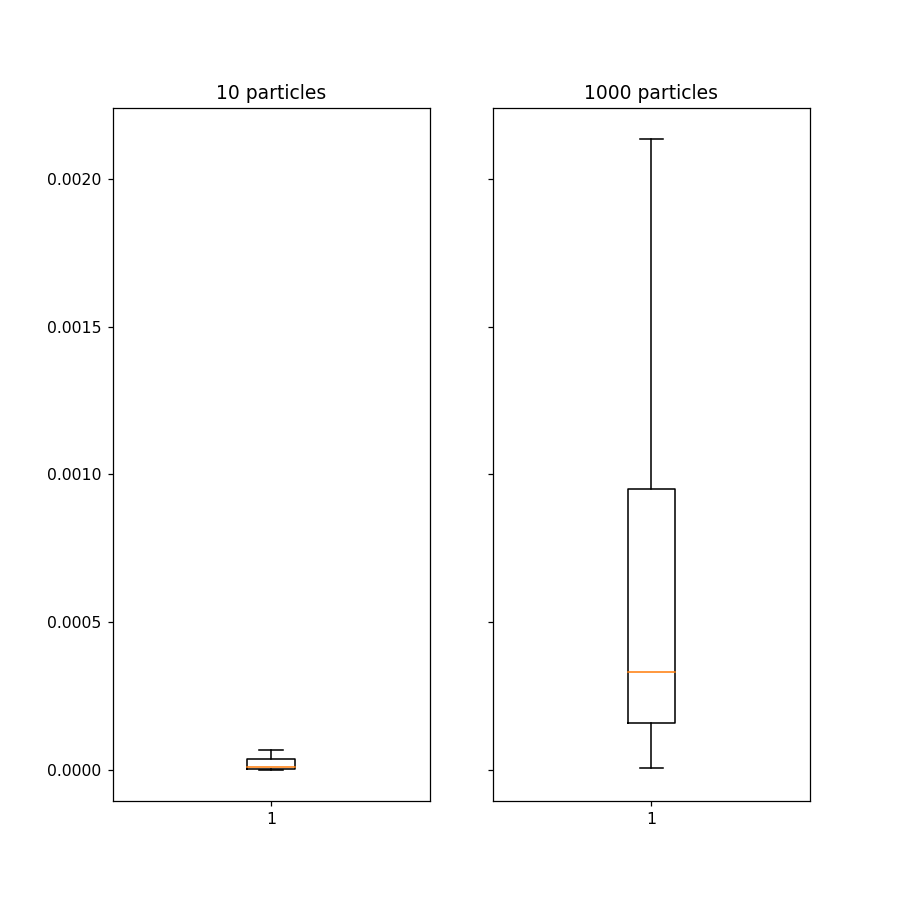

Text(0.5,1,'1000 particles')

In [282]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 8), sharey=True)
axes[0].boxplot(counts10, showfliers = False)
axes[0].set_title('10 particles')
axes[1].boxplot(counts, showfliers = False)
axes[1].set_title('1000 particles')

In [236]:
counts = []

for i in range(1000):
    counts.append(get_darwin_estimate(100, 5, 6))

In [262]:
import pandas as pd
counts_df = pd.DataFrame(counts)
counts_df.describe()

,0
count,1000.000000
mean,0.008136
std,0.083319
min,0.000005
25%,0.000158
50%,0.000331
75%,0.000952
max,1.859028


<IPython.core.display.Javascript object>


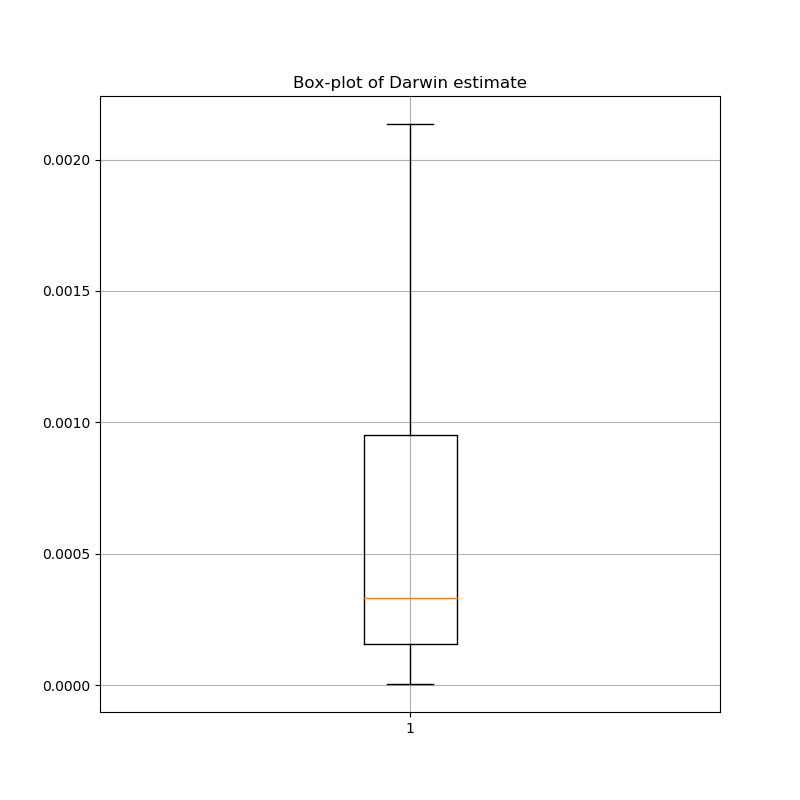

In [258]:
#bins = [i/10000 for i in range(26)]
plt.figure(figsize= (8,8))
plt.boxplot(counts, showfliers = False)
#plt.xlabel('Estimate')
#plt.ylabel('Probability')
plt.title('Box-plot of Darwin estimate')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


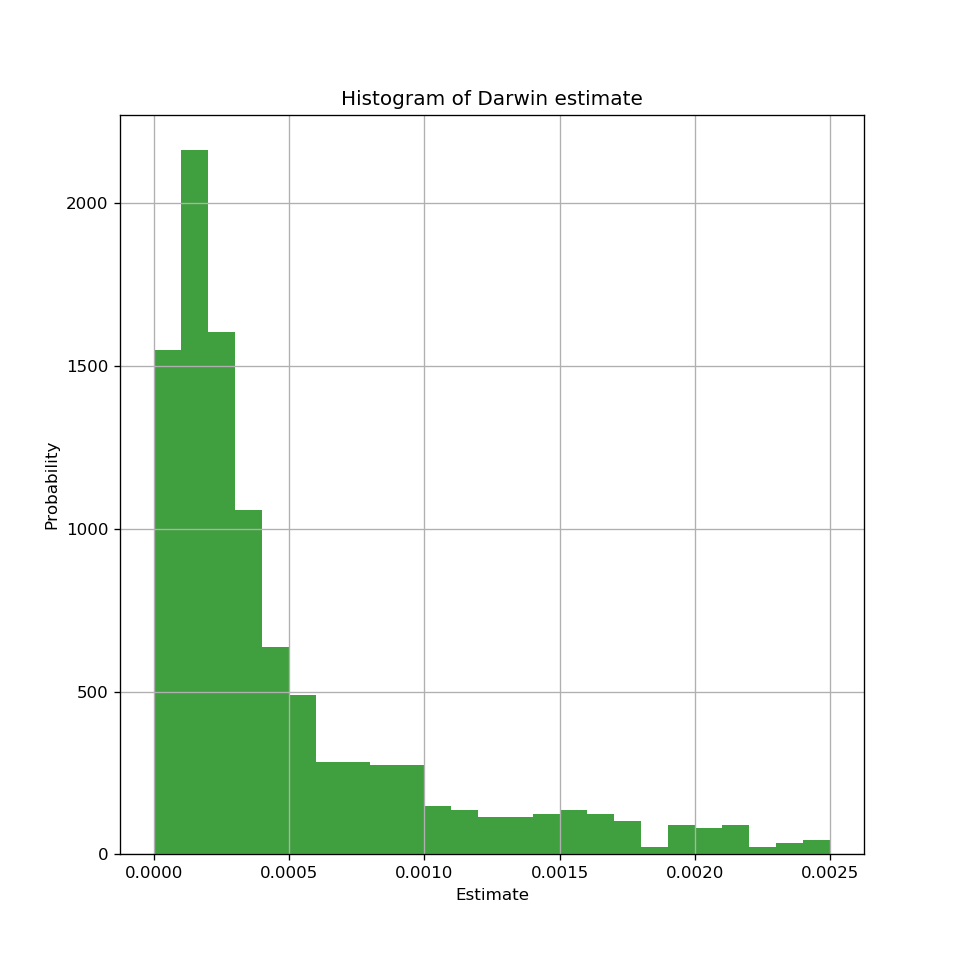

In [254]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
#n, bins, patches = 
bins = [i/10000 for i in range(26)]
plt.figure(figsize= (8,8))
plt.hist(counts, bins = bins, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Estimate')
plt.ylabel('Probability')
plt.title('Histogram of Darwin estimate')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [239]:
len(counts)

1000

In [305]:
import random
random.seed(0)
np.random.seed(0)
sour = [0, 0, 0]
pogl = [0, 0, 0]
while not(distance(sour, pogl) >= 5 and distance(sour, pogl) <= 6):
    for i in range(0,3):
        pogl[i] = random.uniform(0, 5)
        
print(pogl)
s = Sphere(pogl[0], pogl[1], pogl[2], 0.5)

[2.916910197275156, 4.540564425976676, 2.5234342790869513]


In [306]:
distance(sour, pogl)

5.95758432305274

In [331]:
n_points = 50
t = create_paths(n_points, sour)
omegas = []
for i in range(len(t)):
    cur_p = point(t, i, 1)
    last_p = point(t, i, 0)
    omegas.append(calc_omega(last_p, cur_p))

In [332]:
weights = [1 for i in range(n_points)]
is_alive = [1 for i in range(n_points)]
count = 0
n_iter = 2
lambd = 1
while sum(1 for i in is_alive if i == 1)  != 0:
    for i in range(len(t)):
        if is_alive[i] == 1:
            point1 = point(t, i, n_iter - 1)
            point2 = point(t, i, n_iter - 2)
            p1 = Point(point1[0], point1[1], point1[2])
            p2 = Point(point2[0], point2[1], point2[2])
            if sphere_intersect_checking(p1, p2, s) == True:
                count += weights[i]
                is_alive[i] = 2
            else: 
                score = roulette(point2, point1, pogl)
                weights[i] *= 1/score
                if score >= 2:
                    c = int(score)
                    for j in range(c):
                        t = copy_path(t, i, 1)
                        weights.append(weights[i] / c)
                        is_alive.append(1)
                        omegas.append(omegas[i])
                    is_alive[i] = -1
                elif score < 1:
                    prob = random.uniform(0, 1)
                    if (prob <= 1 - score):
                        is_alive[i] = 0
                        
    for i in range(len(t)):
        if is_alive[i] == 1:
            old_point = point(t, i, n_iter - 1)
            omegas[i] = scattering(omegas[i])
            length = np.random.exponential()
            new_point = old_point.copy()
            for j in range(3):
                new_point[j] = old_point[j] + length * omegas[i][j]
            t = write_omega(t, i, new_point)
            
    n_iter += 1
    #print("On iteration {}", n_iter - 1)
    #print(is_alive)
    
    #if n_iter == 15:
    #    break
    

In [333]:
count/50

3.168098069659353e-06

<IPython.core.display.Javascript object>


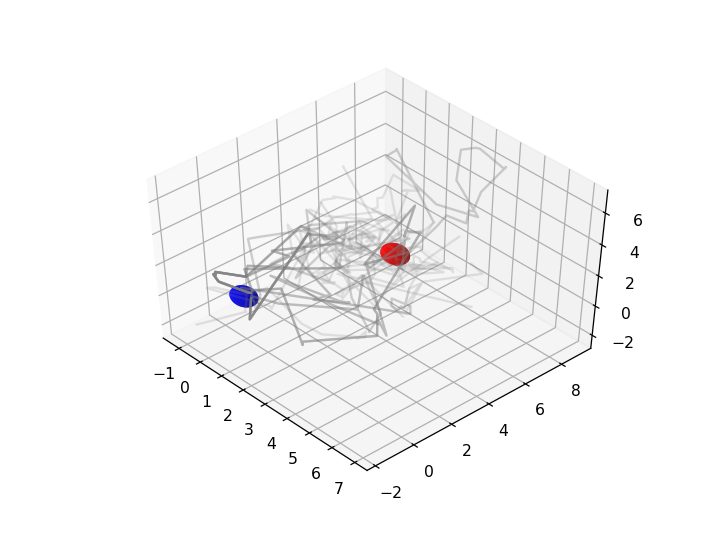

In [337]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')

N=50
stride=1
u = np.linspace(0, 2 * np.pi, N)
v = np.linspace(0, np.pi, N)
x = np.outer(np.cos(u), np.sin(v)) * 0.5
y = np.outer(np.sin(u), np.sin(v)) * 0.5
z = np.outer(np.ones(np.size(u)), np.cos(v)) * 0.5 
ax.plot_surface(x, y, z, linewidth=0.0, cstride=stride, rstride=stride, color = 'b')

u = np.linspace(0, 2 * np.pi, N)
v = np.linspace(0, np.pi, N)
x = np.outer(np.cos(u), np.sin(v)) * 0.5 + pogl[0]
y = np.outer(np.sin(u), np.sin(v)) * 0.5 + pogl[1]
z = np.outer(np.ones(np.size(u)), np.cos(v)) * 0.5 + pogl[2] 
ax.plot_surface(x, y, z, linewidth=0.0, cstride=stride, rstride=stride, alpha = 1, color = 'r')

for i in range(len(t)):
    #if is_alive[i] == 2:
    if i % 100 == 1:
        p = path(t, i)
        ax.plot(p[0], p[1], p[2], color="grey", alpha = 0.2)
    
plt.show()

In [203]:
count

0.00012778699200506112

In [185]:
count

1.1204502604312039

In [61]:
point(t, i, n_iter - 1)

[(1.0660924196937802-0.15119415737612976j),
 (-0.9833917897483666-0.03323754235629358j),
 (1.4889435587608641-0.050397183675565956j)]

In [67]:
a = [[1,2,3]]
a[0] = [4,5,6]
a

[[4, 5, 6]]

In [64]:
t

[[[0.06472918757324084, 0.08621361866154807, 0.09201623182420493],
  [0.12781868034215213, 0.15766387803016144, 0.11028589407307365],
  [0.10123353436260357, 0.09676245102990992, 0.6058869582280513]],
 [[0.19594964725869315, 0.05260031940422824, 0.02766766289614477],
  [0.07582818151973186, 0.165856319646608, 0.1598536316938827],
  [0.11914923853808895, 0.2508240000386788, 0.43055040401950906]],
 [[0.11803567886317834, 2.6464486880807665],
  [0.02517530201709145, 2.0703328568306967],
  [0.10854295886344592, 2.4864155181984455]],
 [[0.20125695675325558, 2.7727573580914755],
  [0.13717482595889732, 0.38394168147433294],
  [0.003510425041004739, -0.6571935516296454]],
 [[0.1670383003079627,
   1.0722509778192795,
   (1.0660924196937802-0.15119415737612976j)],
  [0.0002857048286070696,
   -0.9890726063318329,
   (-0.9833917897483666-0.03323754235629358j)],
  [0.12339446661633116,
   1.4975448256705852,
   (1.4889435587608641-0.050397183675565956j)]],
 [[0.21690069387319522, 0.3078090374333

In [38]:
is_alive[1]

0

In [28]:
sum(is_alive)

10

In [11]:
omegas = []
x = [t[0][0][0], t[0][0][1]]
y = [t[0][1][0], t[0][1][1]]
z = [t[0][2][0], t[0][2][1]]
for i in range(n_points):
    point = [t[i][0][0], t[i][1][0], t[i][2][0]]
    new_point = [t[i][0][1], t[i][1][1], t[i][2][1]]
    omegas.append(calc_omega(point, new_point))

In [ ]:
for i in range(n_points):
    

In [22]:
omega = [0.6, 0.8, 0]
omega_new = [0.6, 0.8, 0]
zenith = random.uniform(0, np.pi)
azimut = random.uniform(0, 2*np.pi)
if (omega[2] != 1):
    omega_new[0] = omega[0]*np.cos(zenith) + np.sin(zenith)*(omega[0]*omega[2]*np.cos(azimut) - omega[1]*np.sin(azimut))/((1 - omega[2]**2)**0.5)
    omega_new[1] = omega[1]*np.cos(zenith) + np.sin(zenith)*(omega[1]*omega[2]*np.cos(azimut) + omega[0]*np.sin(azimut))/((1 - omega[2]**2)**0.5)
    omega_new[2] = omega[2]*np.cos(zenith) - ((1 - omega[2]**2)**0.5)*np.sin(zenith)*np.cos(azimut)
else:
    omega_new[0] = np.sin(zenith)*np.cos(azimut)
    omega_new[1] = np.sin(zenith)*np.sin(azimut)
    omega_new[2] = np.cos(zenith)

#omega_new[2] = omega[2]*zenith + np.cos(azimut)*((((1-zenith)**2) * (1 - omega[2]**2))**0.5)
#omega_new[1] = (1 / (1 - omega[2]**2)) * (omega[1] * (zenith - omega[2] * omega_new[2]) + omega[0] * np.sin(azimut) * ((((1-zenith)**2) * (1 - omega[2]**2))**0.5))
#omega_new[0] =  (1 / (1 - omega[2]**2)) * (omega[0] * (zenith - omega[2] * omega_new[2]) - omega[1] * np.sin(azimut) * ((((1-zenith)**2) * (1 - omega[2]**2))**0.5))
    

In [23]:
print(omega, omega_new, azimut, zenith)

[0.6, 0.8, 0] [-0.8020126265309344, -0.5819406908657541, -0.13461344360665] 1.139408049569918 2.8138149564570507


In [24]:
sum_s(omega_new)

0.9999999999999999


<IPython.core.display.Javascript object>


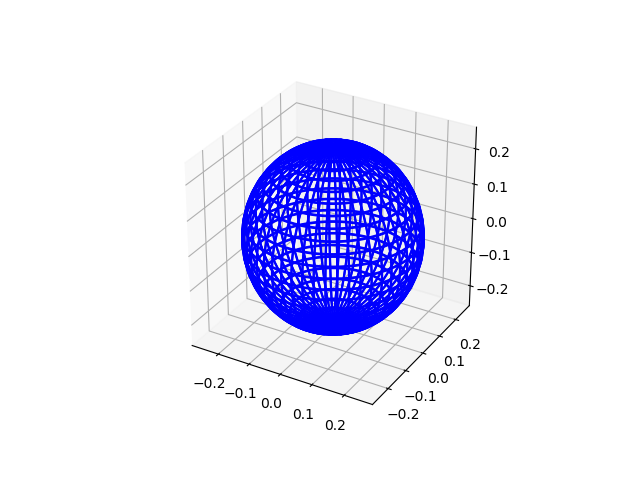

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")


# draw sphere
u, v = np.mgrid[0:2*np.pi:1000j, 0:2*np.pi:1000j]
x = np.cos(u)*np.sin(v)/4
y = np.sin(u)*np.sin(v)/4
z = np.cos(v)/4
ax.plot_wireframe(x, y, z, color="b")



In [25]:
from dataclasses import dataclass


# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
@dataclass()
class Point:
    x: float
    y: float
    z: float


@dataclass()
class Sphere(Point):
    R: float


def is_point_belongs_to_sphere(p: Point, s: Sphere):
    return (p.x - s.x) ** 2 + (p.y - s.y) ** 2 + (p.z - s.z) ** 2 - s.R**2

def sphere_intersect_checking(p1: Point, p2: Point, s: Sphere) -> bool:
    f1 = is_point_belongs_to_sphere(p1, s)
    f2 = is_point_belongs_to_sphere(p2, s)
    if p1 == p2:
        return False
    if f1 * f2 <= 0:
        return True
    if f1 + f2 < 0:
        return True
    if f1 + f2 > 0:
        xc = (p1.x + p2.x) / 2
        yc = (p1.y + p2.y) / 2
        zc = (p1.z + p2.z) / 2
        c = Point(xc, yc, zc)
        # print(f"Новая точка {c} left {p1} right {p2}")
        if (c == p1 or c == p2):
            return False
        if f1 > f2:
            return sphere_intersect_checking(c, p2, s)
        else:
            return sphere_intersect_checking(p1, c, s)
    return False


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    #p1 = Point(1, 1, 1)
    #p2 = Point(10, 1, 1)
    #s = Sphere(3, 55, 1, 3)
    p1 = Point(-1, 0, 0)
    p2 = Point(1, 0, 0)
    s = Sphere(0, 0, 0, 0.5)
    result = sphere_intersect_checking(p1, p2, s)
    print(result)

# See PyCharm help at https://www.jetbrains.com/help/pycharm/


True
